# Introduction

This project will investigate if there is a correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and then to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Which country has the highest life expentancy in 2015 and which has the lowest?
+ Which country has the highest GDP and which has the lowest?
+ Has life expectancy increased or decreased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?
+ What is the average GDP in these nations?
+ What is the distribution of that GDP?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


# Importing Necessary Modules

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Learning More About the Data

In [2]:
df = pd.read_csv('all_data.csv')
df

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
df.shape

(96, 4)

In [5]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [6]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

# Answering our Questions

## Which country has the highest life expentancy in 2015 and which has the lowest?

In [7]:
df_2015 = df[(df.Year == 2015)].reset_index(drop=True)
df_2015

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2015,80.5,2.425180e+11
1,China,2015,76.1,1.106470e+13
2,Germany,2015,81.0,3.375610e+12
3,Mexico,2015,76.7,1.152260e+12
4,United States of America,2015,79.3,1.810000e+13
5,Zimbabwe,2015,60.7,1.630467e+10


In [8]:
df_2015 = df_2015.sort_values(by=['Life expectancy at birth (years)'], ascending=False)
df_2015

,Country,Year,Life expectancy at birth (years),GDP
2,Germany,2015,81.0,3.375610e+12
0,Chile,2015,80.5,2.425180e+11
4,United States of America,2015,79.3,1.810000e+13
3,Mexico,2015,76.7,1.152260e+12
1,China,2015,76.1,1.106470e+13
5,Zimbabwe,2015,60.7,1.630467e+10


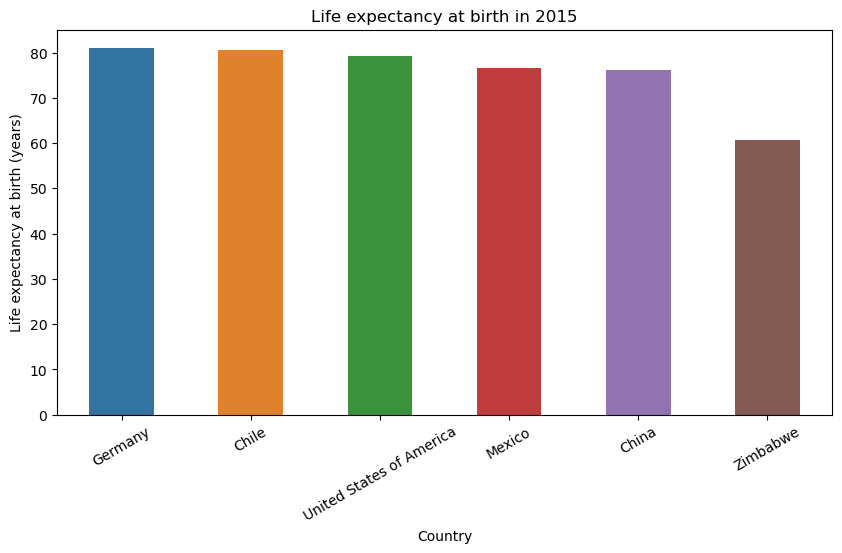

<Figure size 640x480 with 0 Axes>

In [9]:
fig = plt.figure(figsize = (10, 5))
sns.barplot(x=df_2015.Country, y=df_2015['Life expectancy at birth (years)'], width = 0.5, hue = df_2015.Country, legend=False).set(title='Life expectancy at birth in 2015')
plt.xticks(rotation=30)
plt.show()
plt.clf()

In [10]:
# From here we can see that Germany had the highest life expectancy in 2015 and Zimbabwe the lowest

## Which country has the highest GDP and which has the lowest?

In [11]:
df_2015 = df_2015.sort_values(by=['GDP'], ascending=False)
df_2015

,Country,Year,Life expectancy at birth (years),GDP
4,United States of America,2015,79.3,1.810000e+13
1,China,2015,76.1,1.106470e+13
2,Germany,2015,81.0,3.375610e+12
3,Mexico,2015,76.7,1.152260e+12
0,Chile,2015,80.5,2.425180e+11
5,Zimbabwe,2015,60.7,1.630467e+10


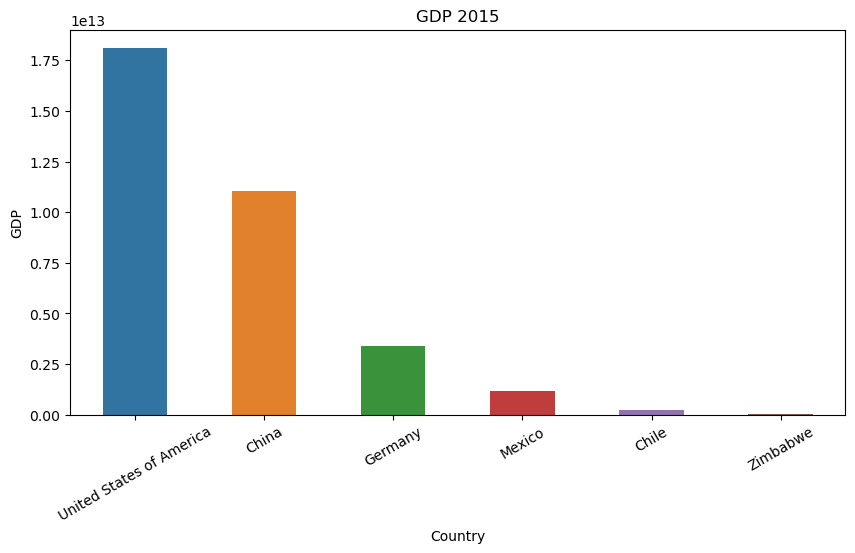

<Figure size 640x480 with 0 Axes>

In [12]:
fig = plt.figure(figsize = (10, 5))
sns.barplot(x=df_2015.Country, y=df_2015['GDP'], width = 0.5, hue = df_2015.Country, legend=False).set(title='GDP 2015')
plt.xticks(rotation=30)
plt.show()
plt.clf()

In [13]:
# From here we can see that the United States has the highest GDP and Zimbabwe has the lowest
# However, a better comparison would be the GDP per capita, since bigger countries tend to have higher GDP

## Has life expectancy increased or decreased over time in the six nations?

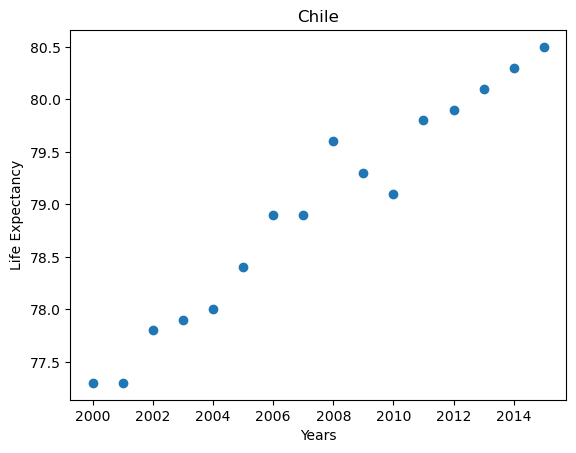

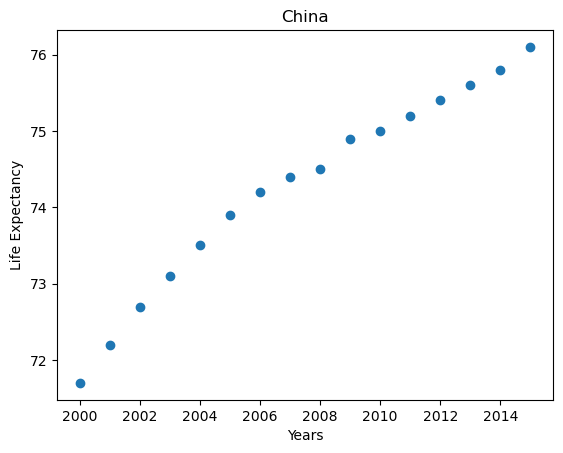

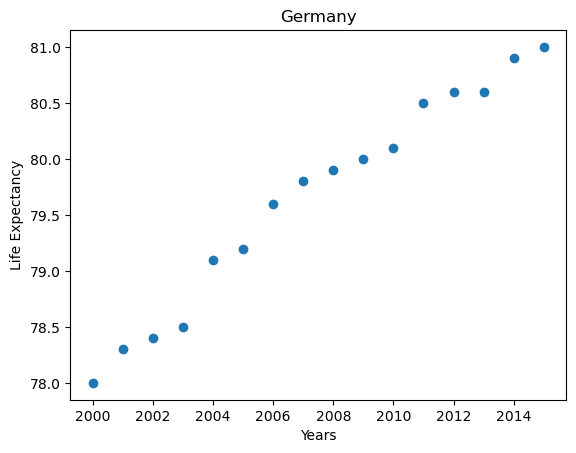

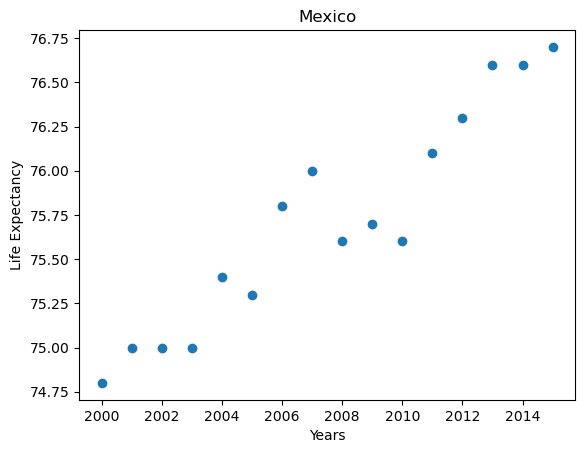

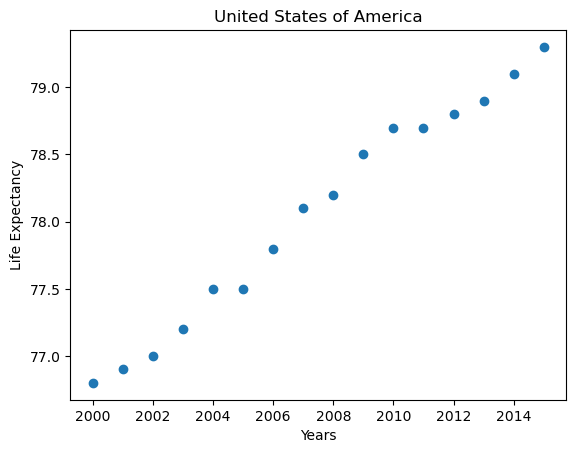

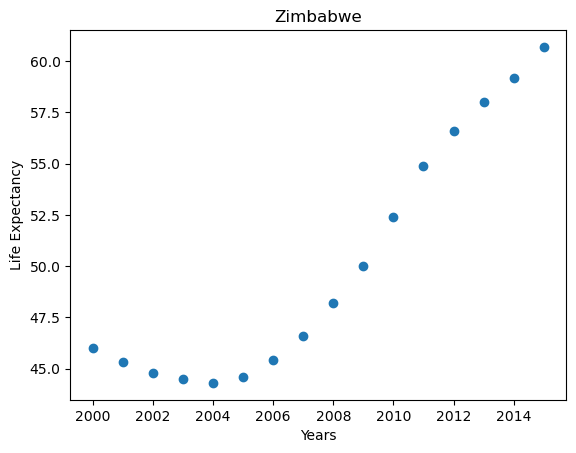

<Figure size 640x480 with 0 Axes>

In [14]:
for country in df.Country.unique():
    df_new = df[(df.Country==country)]
    plt.scatter(x=df_new.Year, y=df_new['Life expectancy at birth (years)'])
    plt.title(country)
    plt.xlabel('Years')
    plt.ylabel('Life Expectancy')
    plt.show()
    plt.clf()

In [15]:
# Here we can clearly see that life expectancy has increased in all countries

## Has GDP increased or decreased over time in the six nations?

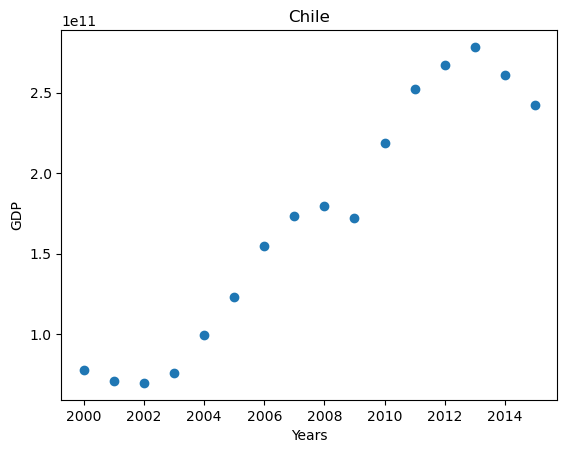

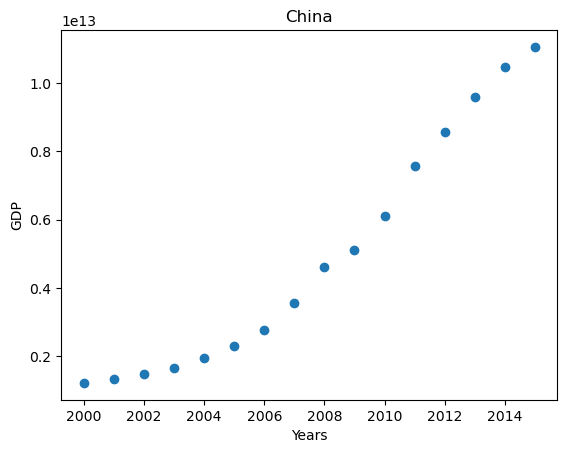

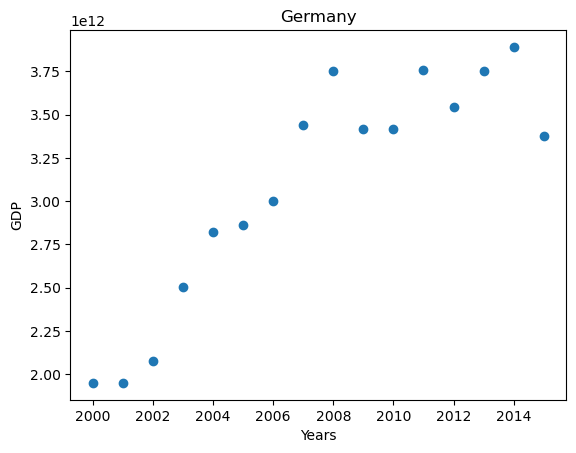

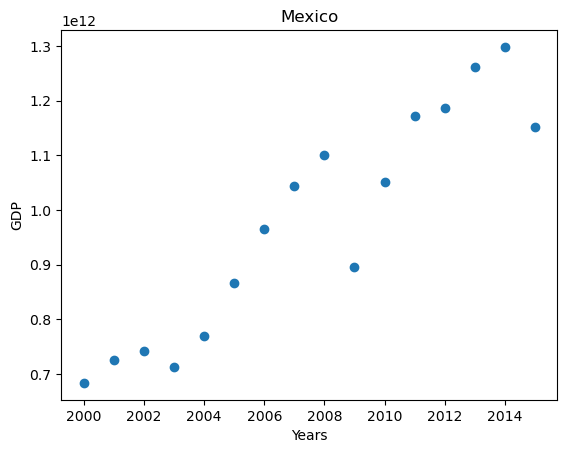

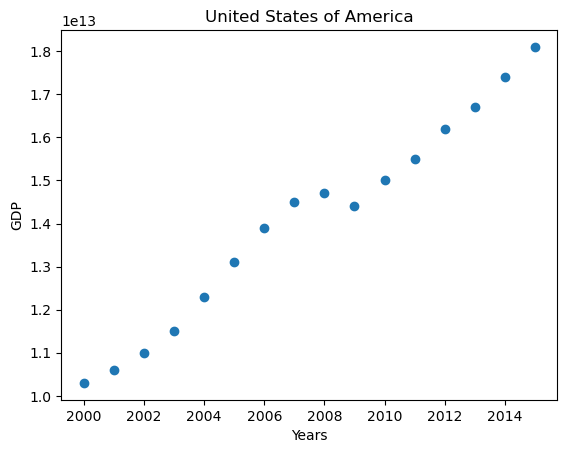

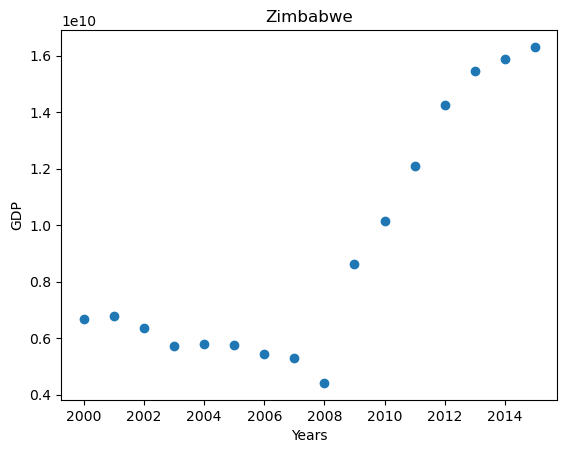

<Figure size 640x480 with 0 Axes>

In [16]:
for country in df.Country.unique():
    df_new = df[(df.Country==country)]
    plt.scatter(x=df_new.Year, y=df_new['GDP'])
    plt.title(country)
    plt.xlabel('Years')
    plt.ylabel('GDP')
    plt.show()
    plt.clf()


In [17]:
# Here we can see that GDP has increased in all countries

## Is there a correlation between GDP and life expectancy of a country?

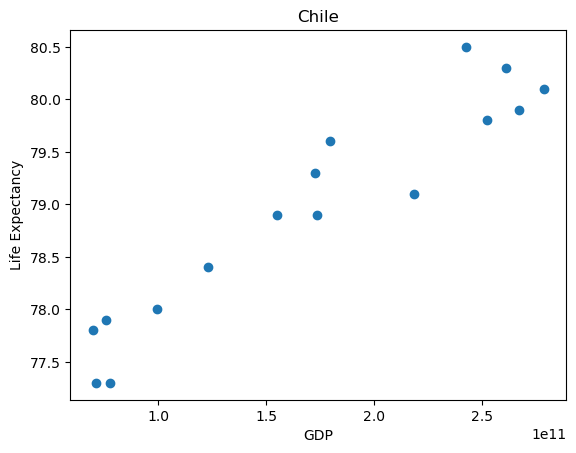

The correlation is 0.95


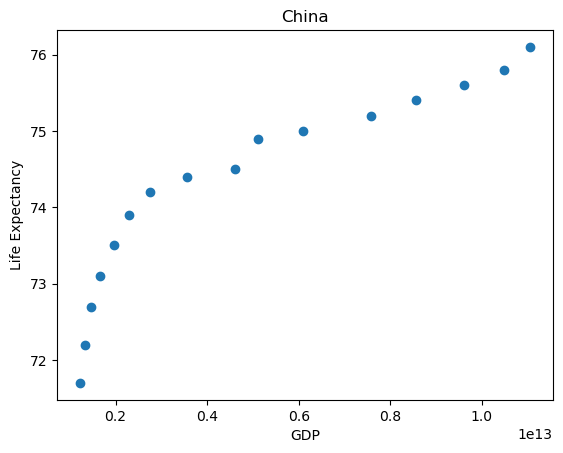

The correlation is 0.91


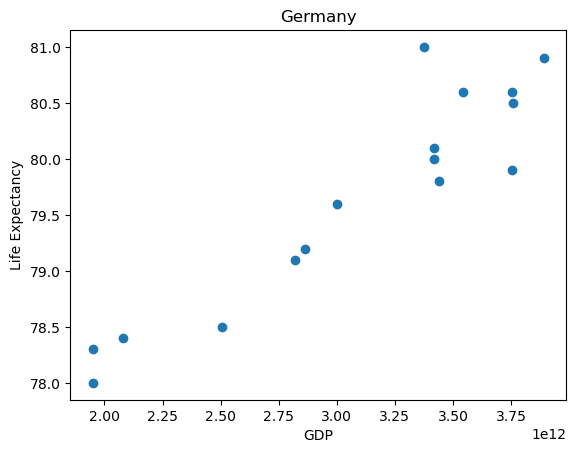

The correlation is 0.93


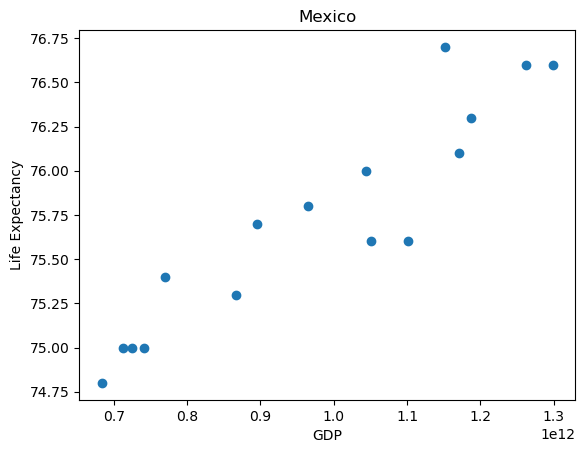

The correlation is 0.93


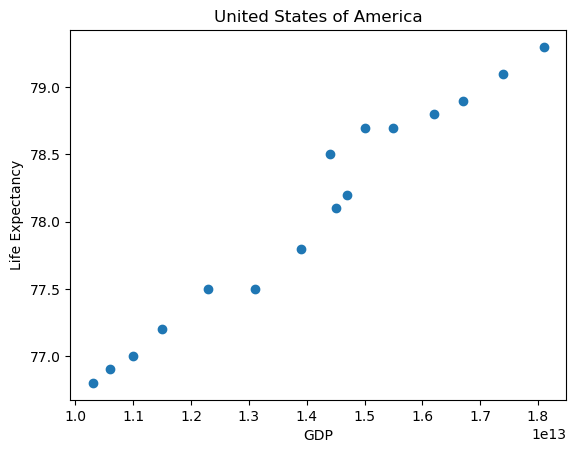

The correlation is 0.98


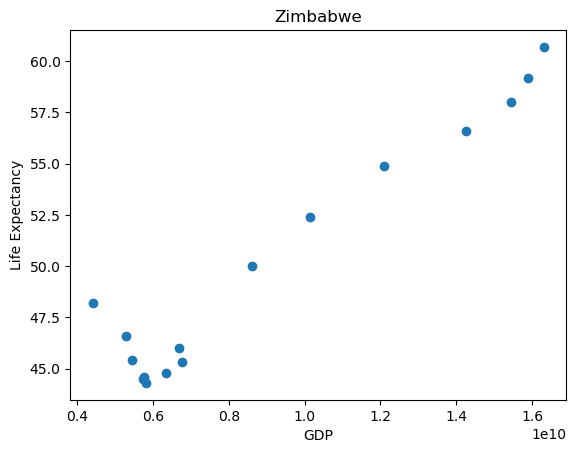

The correlation is 0.97


<Figure size 640x480 with 0 Axes>

In [18]:
for country in df.Country.unique():
    df_new = df[(df.Country==country)]
    plt.scatter(x=df_new.GDP, y=df_new['Life expectancy at birth (years)'])
    plt.title(country)
    plt.xlabel('GDP')
    plt.ylabel('Life Expectancy')
    plt.show()
    plt.clf()
    corr_GDP_Life_Expectancy, p = pearsonr(df_new.GDP, df_new['Life expectancy at birth (years)'])
    print('The correlation is ' + str(round(corr_GDP_Life_Expectancy, 2)))


In [19]:
# By looking at the graphs we can see that there is a correlation between life expectancy and GDP
# Additionally we can see that all countries have correlation between GDP and Life expectancy greater than 0.90,
# which implies a very strong correlation

## What is the average life expectancy in these nations?

In [20]:
country_lst = []
expectancy_lst = []

for country in df.Country.unique():
    df_new = df[(df.Country==country)]
    country_lst.append(country)
    expectancy_lst.append(df_new['Life expectancy at birth (years)'].mean())

In [21]:
country_lst

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

In [22]:
expectancy_lst

[78.94375, 74.26249999999999, 79.65625, 75.71875, 78.0625, 50.09375]

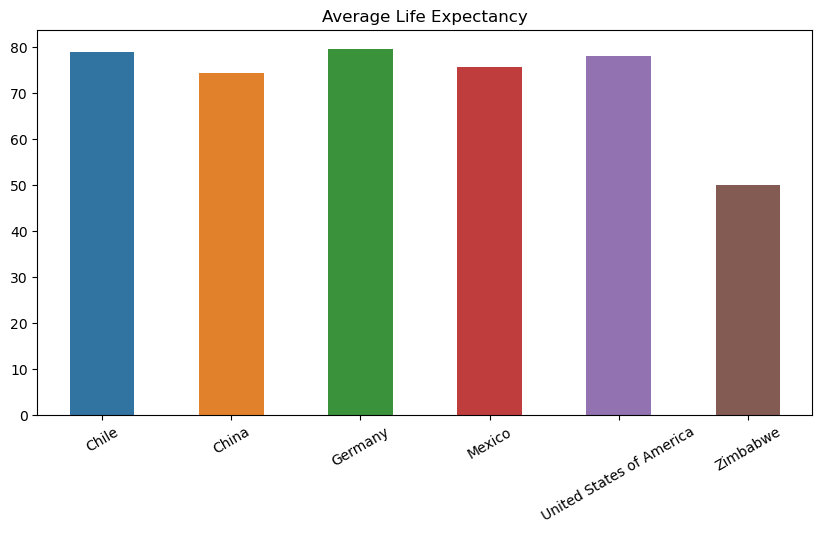

<Figure size 640x480 with 0 Axes>

In [23]:
fig = plt.figure(figsize = (10, 5))
sns.barplot(x=country_lst, y=expectancy_lst, width = 0.5, hue = df_2015.Country, legend=False).set(title='Average Life Expectancy')
plt.xticks(rotation=30)
plt.show()
plt.clf()

## What is the distribution of the life expectancy?

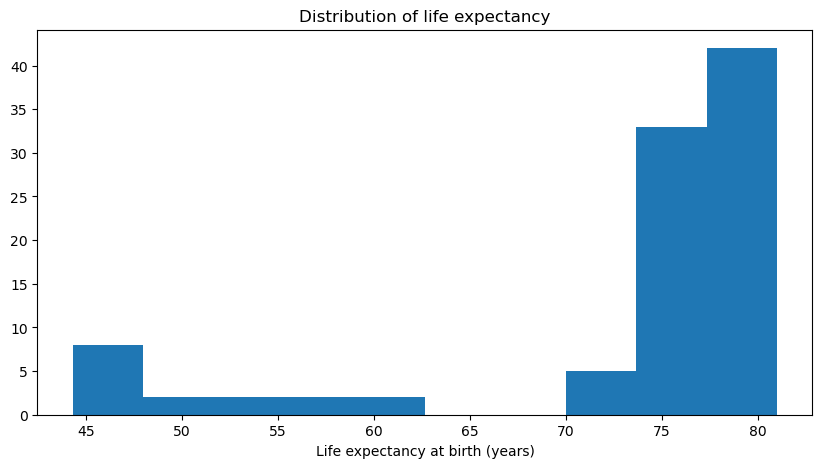

<function matplotlib.pyplot.clf()>

In [24]:
fig = plt.figure(figsize = (10, 5))
plt.hist(df['Life expectancy at birth (years)'])
plt.title('Distribution of life expectancy')
plt.xlabel('Life expectancy at birth (years)')
plt.show()
plt.clf

In [25]:
# The distribution appears to be very left-skewed, but this is probably because Zimbabwe is an outlier
# Let's try to do the same thing but without Zimbabwe

In [26]:
df_no_Zimbabwe = df[(df.Country != 'Zimbabwe')]

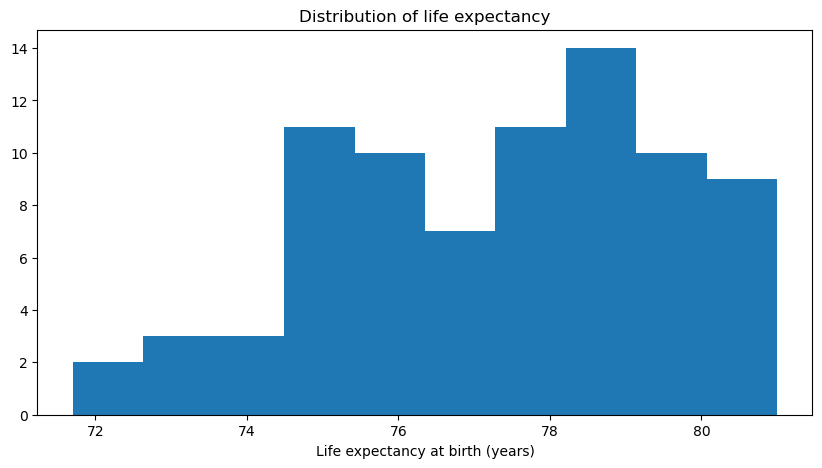

<function matplotlib.pyplot.clf()>

In [27]:
fig = plt.figure(figsize = (10, 5))
plt.hist(df_no_Zimbabwe['Life expectancy at birth (years)'])
plt.title('Distribution of life expectancy')
plt.xlabel('Life expectancy at birth (years)')
plt.show()
plt.clf

In [28]:
# As we suspected, Zimbabwe was the outlier, and now the distribution is a lot more clear

## What is the average GDP in these nations?

In [29]:
country_lst = []
gdp_lst = []

for country in df.Country.unique():
    df_new = df[(df.Country==country)]
    country_lst.append(country)
    gdp_lst.append(df_new['GDP'].mean())

In [30]:
country_lst

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

In [31]:
gdp_lst

[169788845015.3125,
 4957713750000.0,
 3094775625000.0,
 976650625000.0,
 14075000000000.0,
 9062579595.0625]

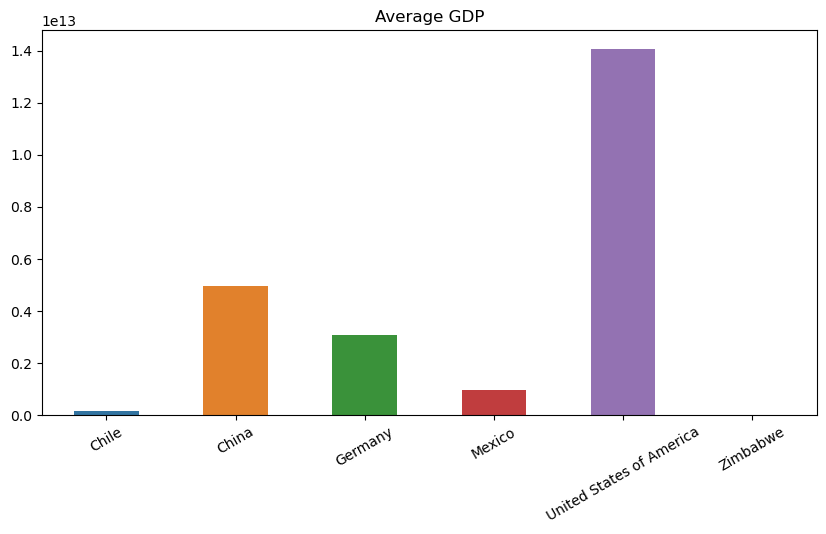

<Figure size 640x480 with 0 Axes>

In [33]:
fig = plt.figure(figsize = (10, 5))
sns.barplot(x=country_lst, y=gdp_lst, width = 0.5, hue = df_2015.Country, legend=False).set(title='Average GDP')
plt.xticks(rotation=30)
plt.show()
plt.clf()

## What is the distribution of the GDP?

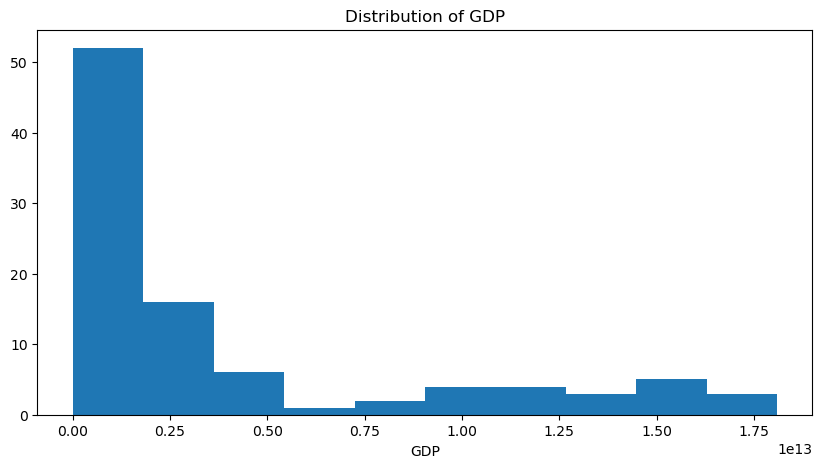

<function matplotlib.pyplot.clf()>

In [37]:
fig = plt.figure(figsize = (10, 5))
plt.hist(df['GDP'])
plt.title('Distribution of GDP')
plt.xlabel('GDP')
plt.show()
plt.clf

In [38]:
# The GDP appears to be very right skewed, which is the opposite of what the life expectancy was